/tmp/ipykernel_682/2519526813.py:99: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  pk_slider = Slider(ax_pk_slider, f'P$_{{K}}$     ', 0, 10000, valinit=800, color='green')
/tmp/ipykernel_682/2519526813.py:112: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  pna_slider = Slider(ax_pna_slider, f'P$_{{Na}}$     ', 0, 10000, valinit=25, color='blue')
/tmp/ipykernel_682/2519526813.py:123: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  pcl_slider = Slider(ax_pcl_slider, f'P$_{{Cl}}$     ', 0, 10000, valinit=1, color='black')
/opt/conda/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


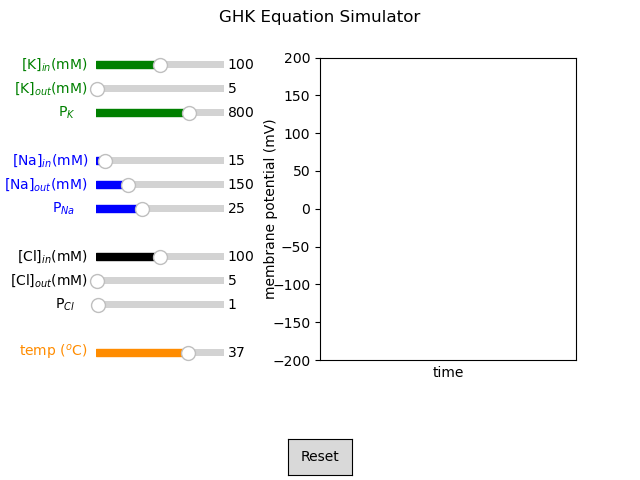

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.lines import Line2D
from matplotlib.widgets import Button, Slider


class Scope:
    def __init__(self, ax, maxt=2, dt=0.006):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]  # initialize time data
        self.ydata = [0]  # initialize y data
        self.line = Line2D(self.tdata, self.ydata, color='red')  # create a line object
        self.ax.add_line(self.line)  # add the line to the axes
        self.ax.set_ylim(-200, 200)  # set the y-axis limits
        self.ax.set_xlim(0, self.maxt)  # set the x-axis limits
        self.vm = self.ax.text(0.6, -0.2, '', transform=self.ax.transAxes, color='red') #creates a text object
        self.ek = self.ax.text(-1, -0.2, '', transform=self.ax.transAxes, color='green')
        self.ena = self.ax.text(-0.5, -0.2, '', transform=self.ax.transAxes, color='blue')
        self.ecl = self.ax.text(0, -0.2, '', transform=self.ax.transAxes)

        

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt >= self.tdata[0] + self.maxt:  # reset the arrays if the time exceeds the limit
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)  # reset the x-axis limits
            self.ax.figure.canvas.draw()

        # This slightly more complex calculation avoids floating-point issues
        # from just repeatedly adding `self.dt` to the previous value.
        t = self.tdata[0] + len(self.tdata) * self.dt  # calculate the new time value

        self.tdata.append(t)  # append the new time value
        self.ydata.append(y)  # append the new y value
        self.line.set_data(self.tdata, self.ydata)  # set the line data
        update_vm(y)
        return self.line,


def emitter():
    k_in = k_in_slider.val
    k_out = k_out_slider.val
    pk = pk_slider.val
    na_in = na_in_slider.val
    na_out = na_out_slider.val
    pna = pna_slider.val
    cl_in = cl_in_slider.val
    cl_out = cl_out_slider.val
    pcl = pcl_slider.val
    temp = temp_slider.val
    R = 8.314 # joule/K/mol
    T = temp+273 # in Kelvin
    F = 96485 # joule/volt/mol
    ghk = (pk*k_out + pna*na_out + pcl*cl_in)/(pk*k_in + pna*na_in + pcl*cl_out)
    nernst_k = 1000*(R*T/F)*np.log(k_out/k_in)
    nernst_na = 1000*(R*T/F)*np.log(na_out/na_in)
    nernst_cl = 1000*(R*T/F)*np.log(cl_in/cl_out)
    vm = 1000*(R*T/F)*np.log(ghk)
    update_vm(vm)
    update_ek(nernst_k)
    update_ena(nernst_na)
    update_ecl(nernst_cl)
    yield vm #vm is what gets plotted


#this draws the chart itself
fig, ax = plt.subplots()
fig.suptitle('GHK Equation Simulator')
scope = Scope(ax)
# making some space for the slide at the bottom
plt.subplots_adjust(bottom=0.25, left=0.5)


plt.xticks([]) #hides the numbers on the x-axis
plt.xlabel('time')
plt.ylabel('membrane potential (mV)', labelpad=-4)

#here is the slider code for Kin
#this line draws the slider in the figure
ax_k_in_slider = fig.add_axes([0.15, 0.85, 0.2, 0.03])
#the four parameters in fig.add_axes define the position and represent percentages of left, bottom, width, height
k_in_slider = Slider(ax_k_in_slider, f'[K]$_{{in}}$(mM)  ', 1, 200, valinit= 100, color='green')
k_in_slider.label.set_color('green')

#add a second slider for Kout
ax_k_out_slider = fig.add_axes([0.15, 0.80, 0.2, 0.03])
k_out_slider = Slider(ax_k_out_slider, f'[K]$_{{out}}$(mM)  ', 1, 600, valinit=5, color='green')
k_out_slider.label.set_color('green')

ax_pk_slider = fig.add_axes([0.15, 0.75, 0.2, 0.03], xscale='log')
pk_slider = Slider(ax_pk_slider, f'P$_{{K}}$     ', 0, 10000, valinit=800, color='green')
pk_slider.label.set_color('green')

#making the [Na]in, [Na]out, and PNa sliders
ax_na_in_slider = fig.add_axes([0.15, 0.65, 0.2, 0.03])
na_in_slider = Slider(ax_na_in_slider, f'[Na]$_{{in}}$(mM)  ', 1, 200, valinit=15, color='blue')
na_in_slider.label.set_color('blue')

ax_na_out_slider = fig.add_axes([0.15, 0.60, 0.2, 0.03])
na_out_slider = Slider(ax_na_out_slider, f'[Na]$_{{out}}$(mM)  ', 1, 600, valinit=150, color='blue')
na_out_slider.label.set_color('blue')

ax_pna_slider = fig.add_axes([0.15, 0.55, 0.2, 0.03], xscale='log')
pna_slider = Slider(ax_pna_slider, f'P$_{{Na}}$     ', 0, 10000, valinit=25, color='blue')
pna_slider.label.set_color('blue')

#making the[Na]in, [Na]out, and PNa sliders
ax_cl_in_slider = fig.add_axes([0.15, 0.45, 0.2, 0.03])
cl_in_slider = Slider(ax_cl_in_slider, f'[Cl]$_{{in}}$(mM)  ', 1, 200, valinit= 100, color='black')

ax_cl_out_slider = fig.add_axes([0.15, 0.40, 0.2, 0.03])
cl_out_slider = Slider(ax_cl_out_slider, f'[Cl]$_{{out}}$(mM)  ', 1, 600, valinit=5, color='black')

ax_pcl_slider = fig.add_axes([0.15, 0.35, 0.2, 0.03], xscale='log')
pcl_slider = Slider(ax_pcl_slider, f'P$_{{Cl}}$     ', 0, 10000, valinit=1, color='black')

#making a temperpature slider
ax_temp_slider = fig.add_axes([0.15, 0.25, 0.2, 0.03])
temp_slider = Slider(ax_temp_slider, f'temp ($^{{o}}$C)  ', 4, 50, valinit= 37, color='darkorange')
temp_slider.label.set_color('darkorange')

#making a text box for EK
#ek_text = ax.text(0.1, -0.25, f'E$_{{K}}$ = -62.5 mV', transform=ax.transAxes)

#define a function that updates vm (the scope output)
def update_vm(val):
    scope.vm.set_text(f'V$_{{m}}$ = {val:.1f} mV') #some LaTeX fuckery here for subscript K

#define a function that updates the text for EK, ENa, and ECl
def update_ek(val):
    scope.ek.set_text(f'E$_{{K}}$ = {val:.1f} mV')

def update_ena(val):
   scope.ena.set_text(f'E$_{{Na}}$ = {val:.1f} mV')
    
def update_ecl(val):
   scope.ecl.set_text(f'E$_{{Cl}}$ = {val:.1f} mV')

#this makes a button to reset all sliders back to their initial values
def reset(event):
    k_in_slider.reset()
    k_out_slider.reset()
    pk_slider.reset()
    na_in_slider.reset()
    na_out_slider.reset()
    pna_slider.reset()
    cl_out_slider.reset()
    cl_in_slider.reset()
    pcl_slider.reset()
    temp_slider.reset()

reset_button = plt.axes([0.45,0.01,0.1,0.075])
button = Button(reset_button, 'Reset')
button.on_clicked(reset)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=50,
                              blit=True, save_count=100)



plt.show()

